

#****Water Quality Prediction****


------
> In this project, we aim to use machine learning algorithms to predict the quality of water sources based on various physical, chemical & biological parameters. By analyzing a comprehensive dataset of water quality measurements, we will develop models that can accurately predict water quality, helping to ensure the safety and well-being of communities that rely on these vital resources.
-----
\
**DATASET**
\
\
The water potability dataset contains information about the physical and chemical properties of water samples from various sources, along with their potability status. The dataset contains 3276 observations and 10 attributes, including :-

(i) pH value: the acidic or alkaline nature of water\
(ii) Hardness: the amount of dissolved calcium and magnesium in water\
(iii) Solids: the total dissolved solids (TDS) in water\
(iv) Chloramines: the amount of chloramines (combination of chlorine and ammonia) in water\
(v) Sulfate: the amount of sulfate in water\
(vi) Conductivity: the ability of water to conduct electricity\
(vii) Organic Carbon: the amount of organic carbon in water\
(viii) Trihalomethanes: the amount of trihalomethanes (byproduct of chlorination) in water\
(ix) Turbidity: the clarity of water\
(x) Potability: indicates whether water is safe for human consumption (1) or not (0)










In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import statistics
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# **Importing The Data File**

In [ ]:
data = pd.read_csv('water_potability.csv')

#**Summary Statistics Of The Dataset**

In [ ]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

#**Data Imputation**

In [ ]:
data.fillna(data.mean(), inplace = True)
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# **Exploratory Data Analysis**

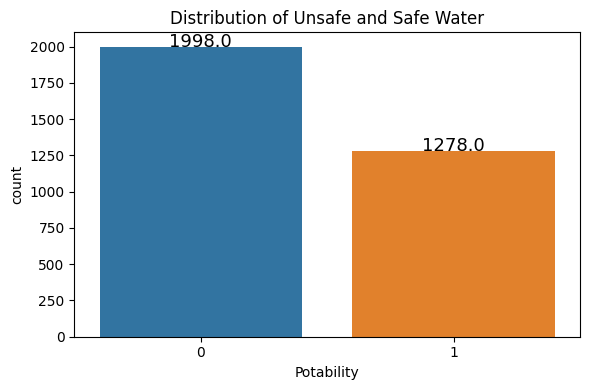

In [ ]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x = data['Potability'])
plt.title("Distribution of Unsafe and Safe Water")
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.7,rect.get_height(),horizontalalignment='center', fontsize = 13)

plt.tight_layout()
plt.show()

In [ ]:
data["Potability"].value_counts(normalize=True)*100

0    60.989011
1    39.010989
Name: Potability, dtype: float64

In [ ]:
plt.figure(figsize=(3, 4))
fig = px.pie(data, names="Potability",color_discrete_sequence=['#041F60','#2CEEF0'])
fig.show()

<Figure size 300x400 with 0 Axes>

# **Few Data Visualizations**

**pH =>**\
pH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

In [ ]:
figure = px.histogram(data, x = "ph",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: ph",
                      color_discrete_sequence=['#041F60','#2CEEF0'])
figure.show()

**Hardness =>**\
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

In [ ]:
figure = px.histogram(data, x = "Hardness",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Hardness",
                      color_discrete_sequence=['#041F60','#2CEEF0'])
figure.show()

**Turbidity =>**\
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

In [ ]:
figure = px.histogram(data, x = "Turbidity",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Turbidity",
                      color_discrete_sequence=['#041F60','#2CEEF0'])
figure.show()

**Organic Carbon =>**\
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

In [ ]:
figure = px.histogram(data, x = "Organic_carbon",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Organic Carbon",
                      color_discrete_sequence=['#041F60','#2CEEF0'])
figure.show()

**Conductivity =>**\
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

In [ ]:
figure = px.histogram(data, x = "Conductivity",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Conductivity",
                      color_discrete_sequence=['#041F60','#2CEEF0'])
figure.show()

**Sulfates =>**\
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

In [ ]:
figure = px.histogram(data, x = "Sulfate",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Sulfate",
                      color_discrete_sequence=['#041F60','#2CEEF0'])
figure.show()

**Solids =>**\
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

In [ ]:
figure = px.histogram(data, x = "Solids",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Solids",
                      color_discrete_sequence=['#041F60','#2CEEF0'])
figure.show()

**Chloramines =>**\
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

In [ ]:
figure = px.histogram(data, x = "Chloramines",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Chloramines",
                      color_discrete_sequence=['#041F60','#2CEEF0'])
figure.show()

**Trihalomethanes =>**\
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

In [ ]:
figure = px.histogram(data, x = "Trihalomethanes",
                      color = "Potability",
                      title= "Factors Affecting Water Quality: Trihalomethanes",
                      color_discrete_sequence=['#041F60','#2CEEF0'])
figure.show()

# **Correlation Matrix**

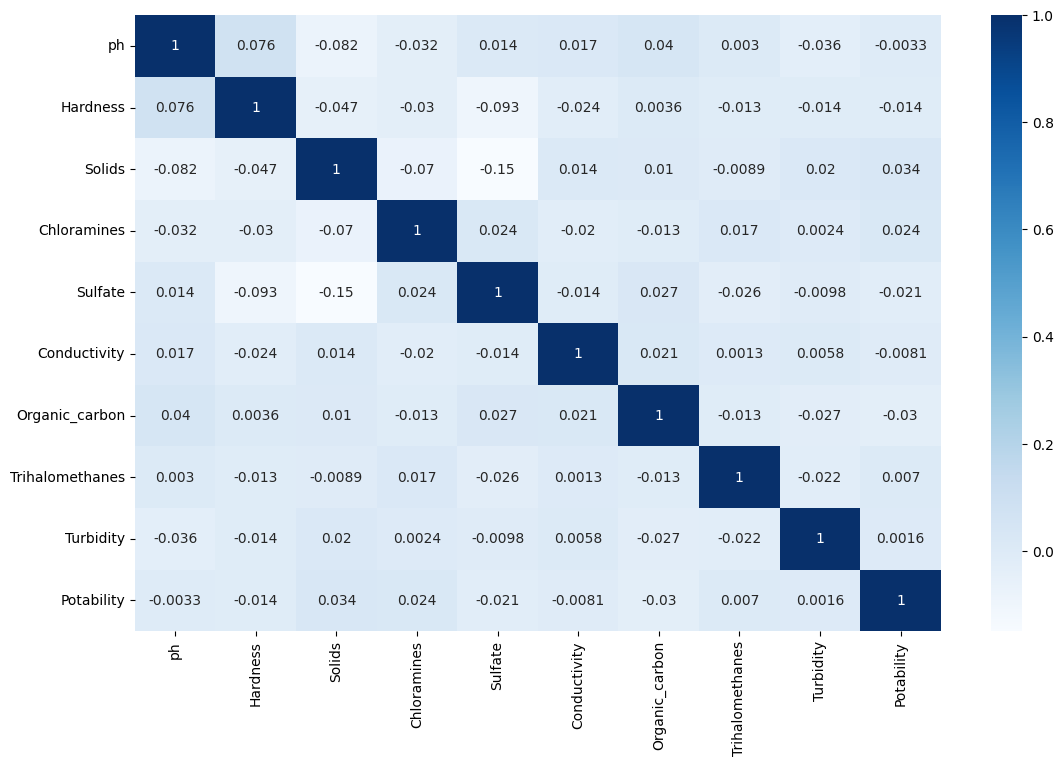

In [ ]:
plt.figure(figsize=(13,8))
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.show()

# **Regression Analysis**
----
> **I. LINEAR REGRESSION**\
Water Potability is a binary classification problem, which means we need to classify water as potable or non-potable based on the above characteristics and features. Linear regression is not well-suited for this type of model because it gives ***continuous values and not binary outcomes***.

In [ ]:
X = data.iloc[:, :-1].values  # to extract the independent variables
y = data.iloc[:, -1].values  # to extract the dependent variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
coefficients = pd.DataFrame({'Feature': data.columns[:-1], 'Coefficients': np.abs(regressor.coef_)})
coefficients = coefficients.sort_values(by='Coefficients', ascending=False)
print(coefficients)

           Feature  Coefficients
3      Chloramines      0.006717
6   Organic_carbon      0.003200
0               ph      0.003054
8        Turbidity      0.002233
7  Trihalomethanes      0.000250
1         Hardness      0.000221
4          Sulfate      0.000166
5     Conductivity      0.000111
2           Solids      0.000002


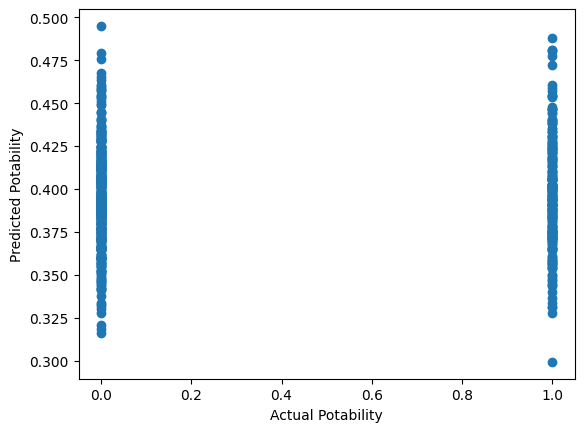

In [ ]:
y_pred = regressor.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Potability")
plt.ylabel("Predicted Potability")
plt.show()

> **II. LOGISTIC REGRESSION**
---
Logistic regression can be used to predict whether water is potable or not based on its chemical and physical characteristics. The independent variables used for prediction can include pH, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, and Turbidity. The dependent variable is the binary variable Potability, which takes a value of 1 if the water is potable and 0 otherwise. The logistic regression model will estimate the coefficients for each independent variable and predict the probability of potability based on these coefficients.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_test, y_test) * 100, 2)

print("Accuracy: ", acc_log)
print(classification_report(y_test, y_pred))

Accuracy:  63.69
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       828
           1       0.89      0.02      0.03       483

    accuracy                           0.64      1311
   macro avg       0.76      0.51      0.40      1311
weighted avg       0.73      0.64      0.50      1311



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Confusion Matrix:-
[[827   1]
 [475   8]]


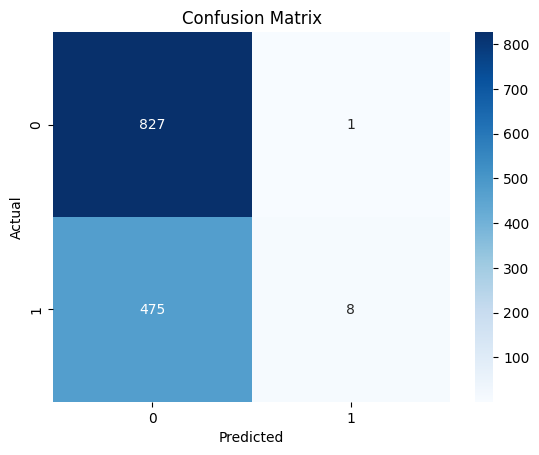

In [ ]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
print('Confusion Matrix:-')
print(cm)
plt.show()

> **III. K NEAREST NEIGHBOUR**
---
The K-Nearest Neighbors (KNN) algorithm was applied to the Water Potability dataset. This algorithm is a type of supervised learning that can be used for classification and regression tasks. In this case, it was used for binary classification to predict whether a water sample is potable or not. The KNN algorithm works by finding the K closest points in the training set to the new data point and classifying the new point based on the majority class of those K points.

In [ ]:
#data cols
x = pd.DataFrame(data, columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
                                'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']).values
y = data['Potability'].values.reshape(-1, 1) #Target variable
x

array([[7.08079450e+00, 2.04890456e+02, 2.07913190e+04, ...,
        8.69909705e+01, 2.96313538e+00, 0.00000000e+00],
       [3.71608007e+00, 1.29422921e+02, 1.86300579e+04, ...,
        5.63290763e+01, 4.50065627e+00, 0.00000000e+00],
       [8.09912419e+00, 2.24236259e+02, 1.99095417e+04, ...,
        6.64200925e+01, 3.05593375e+00, 0.00000000e+00],
       ...,
       [9.41951032e+00, 1.75762646e+02, 3.31555782e+04, ...,
        6.98454003e+01, 3.29887550e+00, 1.00000000e+00],
       [5.12676292e+00, 2.30603758e+02, 1.19838694e+04, ...,
        7.74882131e+01, 4.70865847e+00, 1.00000000e+00],
       [7.87467136e+00, 1.95102299e+02, 1.74041771e+04, ...,
        7.86984463e+01, 2.30914906e+00, 1.00000000e+00]])

In [ ]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state = 0)

In [ ]:
clf = KNeighborsClassifier(metric='manhattan',n_neighbors=5)
clf.fit(x_train, y_train.ravel())
y_pred = clf.predict(x_test)

In [ ]:
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.5745422842197035


In [ ]:
K = 20
Acc = np.zeros((K))
for i in range(1, K+1):
    clf = KNeighborsClassifier(metric='manhattan',n_neighbors = i)
    clf.fit(x_train, y_train.ravel())
    y_pred = clf.predict(x_test)
    Acc[i-1] = metrics.accuracy_score(y_test, y_pred)
Acc

array([0.55013078, 0.60505667, 0.56233653, 0.60069747, 0.57454228,
       0.59721011, 0.59459459, 0.59982563, 0.58500436, 0.61115955,
       0.60331299, 0.61115955, 0.60854403, 0.6190061 , 0.61726242,
       0.61377507, 0.61639058, 0.61639058, 0.60767219, 0.60941587])

In [ ]:
print(np.max(Acc))
print(np.min(Acc))

0.6190061028770706
0.5501307759372276


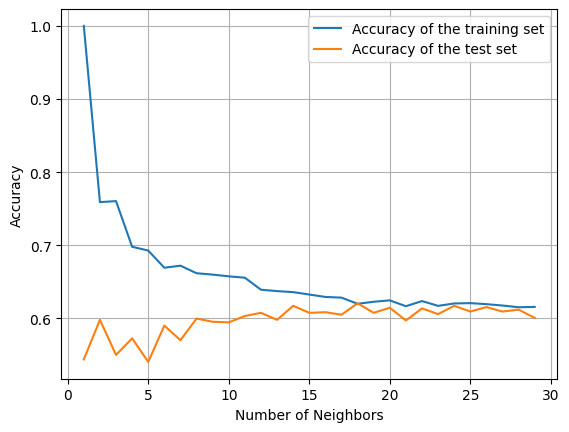

In [ ]:
training_acc = []
test_acc = []

# try KNN for different k nearest neighbor from 1 to 30
neighbors_setting = range(1, 30)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(x_train, y_train.ravel())
    training_acc.append(knn.score(x_train, y_train))
    test_acc.append(knn.score(x_test, y_test))
plt.plot(neighbors_setting, training_acc, label = 'Accuracy of the training set')
plt.plot(neighbors_setting, test_acc, label = 'Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
clf = KNeighborsClassifier(metric='manhattan',n_neighbors=18)
clf.fit(x_train, y_train.ravel())
y_pred = clf.predict(x_test)
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred)*100)

Accuracy :  61.63905841325196


Confusion Matrix :-
[[648 369]
 [ 71  59]]


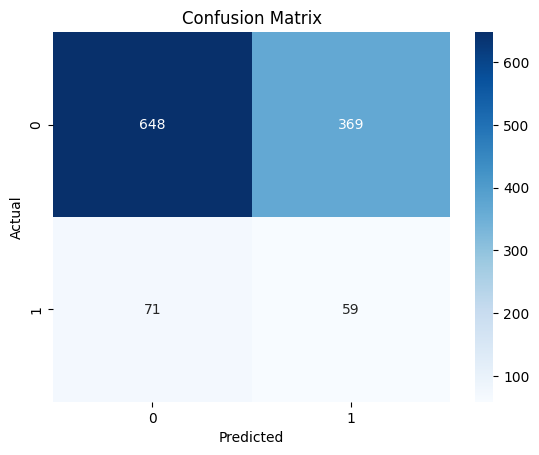

              precision    recall  f1-score   support

           0       0.64      0.90      0.75       719
           1       0.45      0.14      0.21       428

    accuracy                           0.62      1147
   macro avg       0.55      0.52      0.48      1147
weighted avg       0.57      0.62      0.55      1147



In [ ]:
cmk=confusion_matrix(y_pred,y_test)

sns.heatmap(cmk, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
print('Confusion Matrix :-')
print(cmk)
plt.show()
print(classification_report(y_test, y_pred))